In [32]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [33]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [36]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [37]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [38]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 112ms/step - loss: 1.3579 - accuracy: 0.5765 - val_loss: 0.6784 - val_accuracy: 0.5842
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.6184 - accuracy: 0.6672 - val_loss: 0.6306 - val_accuracy: 0.6322
Epoch 3/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5476 - accuracy: 0.7236 - val_loss: 0.5931 - val_accuracy: 0.6676
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4728 - accuracy: 0.7711 - val_loss: 0.4721 - val_accuracy: 0.7774
Epoch 5/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4094 - accuracy: 0.8017 - val_loss: 0.4738 - val_accuracy: 0.7678
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3543 - accuracy: 0.8332 - val_loss: 0.4186 - val_accuracy: 0.8044
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3101 - accuracy: 0.8573 - val_loss: 0.6031 - val_ac

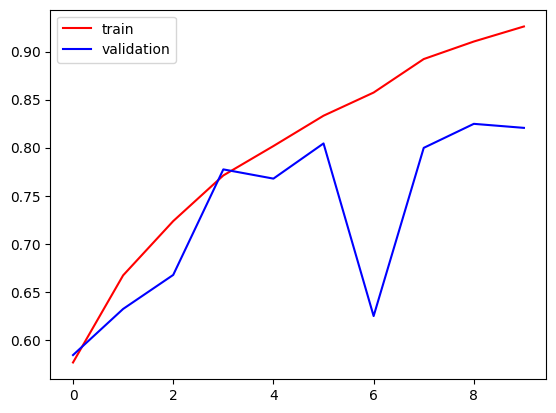

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

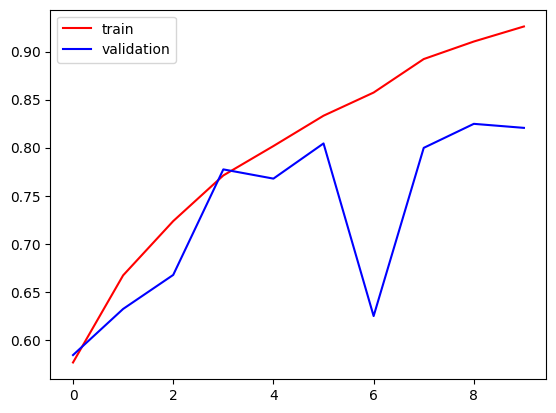

In [43]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

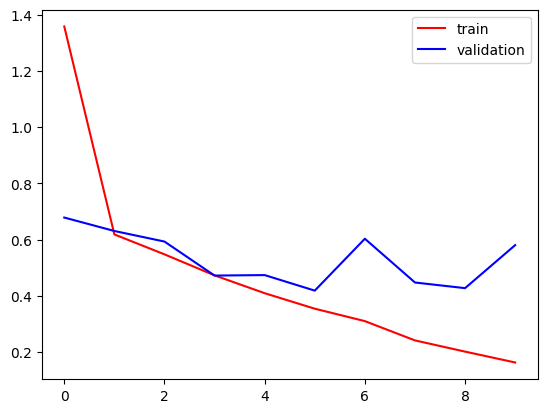

In [44]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

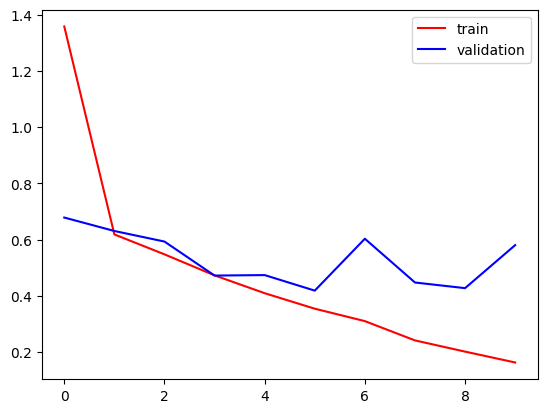

In [45]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [46]:
import cv2

In [55]:
test_img = cv2.imread('/content/dog.jpg')

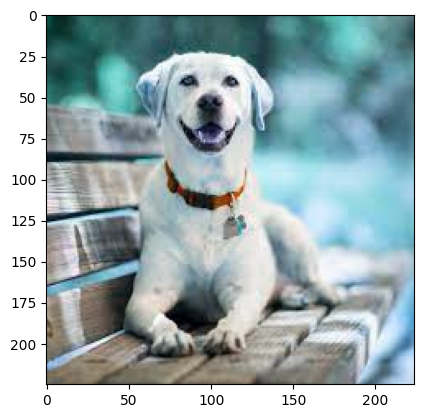

In [56]:
plt.imshow(test_img)

In [57]:
test_img.shape

(225, 224, 3)

In [58]:
test_img = cv2.resize(test_img,(256,256))

In [59]:
test_input = test_img.reshape((1,256,256,3))

In [60]:
model.predict(test_input)

1/1 [==============================] - 0s 265ms/step


array([[1.]], dtype=float32)

In [62]:
test_img = cv2.imread('/content/cat.jpg')

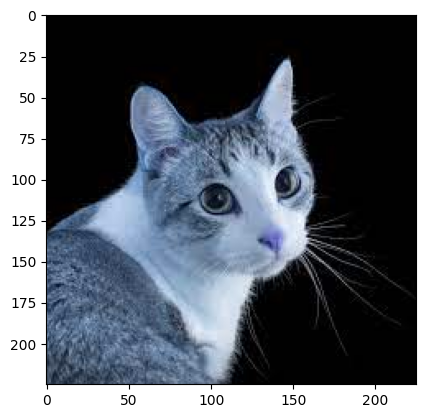

In [63]:
plt.imshow(test_img)

In [64]:
test_img.shape

(225, 225, 3)

In [65]:
test_img = cv2.resize(test_img,(256,256))

In [66]:
test_input = test_img.reshape((1,256,256,3))

In [67]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)